<a href="https://colab.research.google.com/github/plaban1981/Personal-ML/blob/master/Naive_Bayes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing Naive bayes using Scikit learn

#### there are three types of naive bayes in scikit learn

- Multinomial. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

- Bernoulli. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

- Gaussian. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://github.com/2796gaurav/Naive-bayes-explained/blob/master/Naive%20bayes/Naive%20Bayes%20in%20scikit%20learn.ipynb

#### Diabetes files consist of four fields per record. Each field is separated by a tab and each record is separated by a newline.

File Names and format:
(1) Date in MM-DD-YYYY format
(2) Time in XX:YY format
(3) Code
(4) Value

The Code field is deciphered as follows:

- 33 = Regular insulin dose
- 34 = NPH insulin dose
- 35 = UltraLente insulin dose
- 48 = Unspecified blood glucose measurement
- 57 = Unspecified blood glucose measurement
- 58 = Pre-breakfast blood glucose measurement
- 59 = Post-breakfast blood glucose measurement
- 60 = Pre-lunch blood glucose measurement
- 61 = Post-lunch blood glucose measurement
- 62 = Pre-supper blood glucose measurement
- 63 = Post-supper blood glucose measurement
- 64 = Pre-snack blood glucose measurement
- 65 = Hypoglycemic symptoms
- 66 = Typical meal ingestion
- 67 = More-than-usual meal ingestion
- 68 = Less-than-usual meal ingestion
- 69 = Typical exercise activity
- 70 = More-than-usual exercise activity
- 71 = Less-than-usual exercise activity
- 72 = Unspecified special event

In [0]:
#from google.colab import files
#files.upload()

## Import Libraries

In [0]:
# import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
column = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
df = pd.read_csv('pima-indians-diabetes.data.csv',names=column)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Visualization of the Class Label

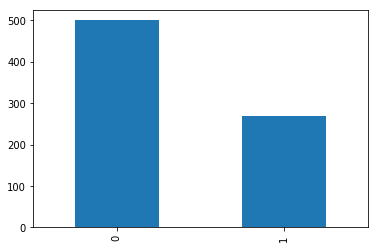

In [13]:
df.Outcome.value_counts().plot(kind='bar')

#### P(c|x) = P(x|c) * P(c) /P(x)



- P(c|x) is the posterior probability of class c given predictor ( features).
- P(c) is the probability of class.
- P(x|c) is the likelihood which is the probability of predictor given class.
- P(x) is the prior probability of predictor.

## Identify Features and Labels 

In [0]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

## Test Train Split

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

## Applying Gaussian NaiveBayes

In [19]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predictions

In [0]:
y_pred = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)

## Accuracy Score of the Classification Model

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
print(f'Accuracy Score of the Gaussian Naive Bayes model {np.round(accuracy_score(y_pred,y_test)*100.0,2)}%')

Accuracy Score of the Gaussian Naive Bayes model 77.27%


## Confusion Matrix

In [0]:
cm = confusion_matrix(y_pred,y_test)

In [27]:
print(cm)

[[85 21]
 [14 34]]


## Transform to df for easier plotting

In [0]:
cm_df = pd.DataFrame(cm,index=['Not Diabetic','Diabetic'],
                     columns=['Not Diabetic','Diabetic'])

In [31]:
print(cm_df)

              Not Diabetic  Diabetic
Not Diabetic            85        21
Diabetic                14        34


Text(33.0, 0.5, 'True Label')

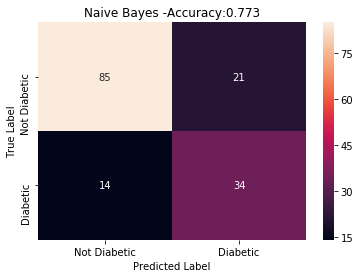

In [33]:
#pass fmt='g' to the heatmap call to keep numbers from going to scientific notation
sns.heatmap(cm_df,annot=True,fmt='g')
plt.title('Naive Bayes -Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## ROC Curve


In [36]:
!pip install scikit-plot

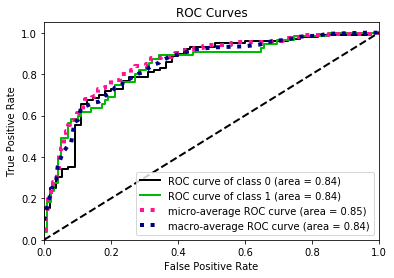

In [37]:
import scikitplot
scikitplot.metrics.plot_roc(y_test,y_pred_proba)

## Lets test our model with random input

In [46]:
# Create an empty dataframe that we have to predict 
person = pd.DataFrame()

# Create some feature values for this single row
person['Pregnancies'] = [7]
person['Glucose'] = [130]
person['BloodPressure'] = [86]
person['SkinThickness'] = [34]
person['Insulin'] = [0]
person['BMI'] = [33.5]
person['DiabetesPedigreeFunction'] = [0.564]
person['Age'] = [50]
# View the data 
person

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,130,86,34,0,33.5,0.564,50


## Predictions made on the new Data Sample

In [52]:
diabetic = gb.predict(person)
if diabetic[0] == 1 :
  print("The person is diabetic")
else:
  print("The person is not diabetic")

The person is diabetic


## Multinomial Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
mn_y_pred = mn.predict(X_test)

In [41]:
print(f'Accuracy Score of the Multinomial Naive Bayes model {np.round(accuracy_score(mn_y_pred,y_test)*100.0,2)}%')

Accuracy Score of the Multinomial Naive Bayes model 51.3%


##Bernoulli Naive Bayes 

In [43]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
bn_pred = bnb.predict(X_test)

In [45]:
print(f'Accuracy Score of the Bernoulli Naive Bayes model {np.round(accuracy_score(bn_pred,y_test)*100.0,2)}%')

Accuracy Score of the Bernoulli Naive Bayes model 61.69%
